In [ ]:
!pip install radis

**Loading Dependencies**

In [2]:
import matplotlib.pyplot as plt
from radis import plot_diff, SpectrumFactory, get_residual
from publib import set_style, fix_style
import numpy as np

**Setting up parameters**

In [1]:
# Computation parameters
wmin = 2000
wmax = 10000
dv = 0.005
T = 3000.0 #K
p = 0.1 #bar
broadening_max_width=10 

**Defining Spectrum Factory Object**

In [7]:
#%% Calculate reference
sf = SpectrumFactory(wavenum_min=wmin, wavenum_max=wmax, 
                  pressure=p,
                  wstep=dv,
                  broadening_max_width=broadening_max_width, 
                  molecule="CO",
                  cutoff=0, # 1e-27,
                  verbose=2,
                  )

**Downloading/Loading Database from hitran.**
**If already downloaded then skip this** 

In [ ]:
sf.fetch_databank('hitemp',load_energies=False)


**Defining variabes to store spectrum**

In [9]:
#  Defining variabes to store spectrum
spectra_default = {}
Nlines_target = [1e1, 1e2, 1e3, 1e4, 1e5,1.1e5,1.2e5]  # Number of lines in the dataframe df0
Nlines = []


**Function to take complement of an array of indexes in a range**

In [5]:
# Finds complement of the lines to drop
def find_missing(lst, N):
    start = 0
    end = N-1
    return sorted(set(range(start, end + 1)).difference(lst))

**Calculating time for Legacy method for different number of lines and see what is the bottleneck step (_calc_lineshape or _apply_lineshape)**

In [10]:
for Ntarget in Nlines_target:
    
    # Load HITEMP database for this species/range
    sf.load_databank('HITEMP-CO',load_energies=False)

    # Reduce number of lines to approximately Nlines:
    rows = np.arange(0,len(sf.df0),max(1,int(len(sf.df0)//Ntarget)))
    # Complements the array
    rows = find_missing(rows,len(sf.df0))
    rows = sf.df0.index[rows]
    # Drops the array to use
    sf.df0.drop(rows, inplace=True)
    #sf.df0 = sf.df0[::max(1,int(len(sf.df0)//Ntarget))]
    N = len(sf.df0)
    Nlines.append(N)
    
    #%% Calculate normal

    sf.params['optimization'] = None
    sf.params['broadening_method'] = 'voigt'
    s_none = sf.eq_spectrum(T)
    s_none.name = 'Default ({0:.1f}s)'.format(s_none.conditions['calculation_time'])
    spectra_default[N] = s_none

Using database: HITEMP-CO
'HITEMP-CO':
{'info': 'HITEMP CO lines (2.2-22148.3 cm-1) with TIPS-2017 (through HAPI) for partition functions and RADIS spectroscopic constants for rovibrational energies (nonequilibrium)', 'path': ['/root/.radisdb/CO-05_HITEMP2019.h5'], 'format': 'hitemp-radisdb', 'parfuncfmt': 'hapi', 'levelsfmt': 'radis', 'download_url': 'https://hitran.org/hitemp/data/bzip2format/05_HITEMP2019.par.bz2', 'download_date': '10 Apr 2021', 'wavenumber_min': '2.248764', 'wavenumber_max': '22148.273542'} 



Loading Line databank
... Fetching molecular parameters for all transitions
... Fetched molecular params in 0.05s
Loaded databank in 2.8s (374,884 lines)
HAPI version: 1.1.2.0
HAPI version: 1.1.2.0
HAPI version: 1.1.2.0
HAPI version: 1.1.2.0
HAPI version: 1.1.2.0
HAPI version: 1.1.2.0
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 3000.0 K
   Trot                 3000.0 K
   Tvib                 3000.0 K

/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))


Calculated other spectral quantities in 0.22s
Spectrum calculated in 0.29s (before object generation)
Generated Spectrum object in 0.14s
Spectrum calculated in 0.43s
Using database: HITEMP-CO
'HITEMP-CO':
{'info': 'HITEMP CO lines (2.2-22148.3 cm-1) with TIPS-2017 (through HAPI) for partition functions and RADIS spectroscopic constants for rovibrational energies (nonequilibrium)', 'path': ['/root/.radisdb/CO-05_HITEMP2019.h5'], 'format': 'hitemp-radisdb', 'parfuncfmt': 'hapi', 'levelsfmt': 'radis', 'download_url': 'https://hitran.org/hitemp/data/bzip2format/05_HITEMP2019.par.bz2', 'download_date': '10 Apr 2021', 'wavenumber_min': '2.248764', 'wavenumber_max': '22148.273542'} 



Loading Line databank
... Fetching molecular parameters for all transitions
... Fetched molecular params in 0.01s
Loaded databank in 3.2s (374,884 lines)
HAPI version: 1.1.2.0
HAPI version: 1.1.2.0
HAPI version: 1.1.2.0
HAPI version: 1.1.2.0
HAPI version: 1.1.2.0
HAPI version: 1.1.2.0
Calculating Equilibrium Sp

/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))


Calculated other spectral quantities in 0.20s
Spectrum calculated in 0.32s (before object generation)
Generated Spectrum object in 0.14s
Spectrum calculated in 0.46s
Using database: HITEMP-CO
'HITEMP-CO':
{'info': 'HITEMP CO lines (2.2-22148.3 cm-1) with TIPS-2017 (through HAPI) for partition functions and RADIS spectroscopic constants for rovibrational energies (nonequilibrium)', 'path': ['/root/.radisdb/CO-05_HITEMP2019.h5'], 'format': 'hitemp-radisdb', 'parfuncfmt': 'hapi', 'levelsfmt': 'radis', 'download_url': 'https://hitran.org/hitemp/data/bzip2format/05_HITEMP2019.par.bz2', 'download_date': '10 Apr 2021', 'wavenumber_min': '2.248764', 'wavenumber_max': '22148.273542'} 



Loading Line databank
... Fetching molecular parameters for all transitions
... Fetched molecular params in 0.01s
Loaded databank in 3.2s (374,884 lines)
HAPI version: 1.1.2.0
HAPI version: 1.1.2.0
HAPI version: 1.1.2.0
HAPI version: 1.1.2.0
HAPI version: 1.1.2.0
HAPI version: 1.1.2.0
Calculating Equilibrium Sp

/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))


Calculated line broadening in 0.36s
Calculated other spectral quantities in 0.21s
Spectrum calculated in 0.65s (before object generation)
Generated Spectrum object in 0.15s
Spectrum calculated in 0.79s
Using database: HITEMP-CO
'HITEMP-CO':
{'info': 'HITEMP CO lines (2.2-22148.3 cm-1) with TIPS-2017 (through HAPI) for partition functions and RADIS spectroscopic constants for rovibrational energies (nonequilibrium)', 'path': ['/root/.radisdb/CO-05_HITEMP2019.h5'], 'format': 'hitemp-radisdb', 'parfuncfmt': 'hapi', 'levelsfmt': 'radis', 'download_url': 'https://hitran.org/hitemp/data/bzip2format/05_HITEMP2019.par.bz2', 'download_date': '10 Apr 2021', 'wavenumber_min': '2.248764', 'wavenumber_max': '22148.273542'} 



Loading Line databank
... Fetching molecular parameters for all transitions
... Fetched molecular params in 0.01s
Loaded databank in 3.2s (374,884 lines)
HAPI version: 1.1.2.0
HAPI version: 1.1.2.0
HAPI version: 1.1.2.0
HAPI version: 1.1.2.0
HAPI version: 1.1.2.0
HAPI version

/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))


Calculated line broadening in 3.11s
Calculated other spectral quantities in 0.22s
Spectrum calculated in 3.44s (before object generation)
Generated Spectrum object in 0.15s
Spectrum calculated in 3.59s
Using database: HITEMP-CO
'HITEMP-CO':
{'info': 'HITEMP CO lines (2.2-22148.3 cm-1) with TIPS-2017 (through HAPI) for partition functions and RADIS spectroscopic constants for rovibrational energies (nonequilibrium)', 'path': ['/root/.radisdb/CO-05_HITEMP2019.h5'], 'format': 'hitemp-radisdb', 'parfuncfmt': 'hapi', 'levelsfmt': 'radis', 'download_url': 'https://hitran.org/hitemp/data/bzip2format/05_HITEMP2019.par.bz2', 'download_date': '10 Apr 2021', 'wavenumber_min': '2.248764', 'wavenumber_max': '22148.273542'} 



Loading Line databank
... Fetching molecular parameters for all transitions
... Fetched molecular params in 0.01s
Loaded databank in 3.2s (374,884 lines)
HAPI version: 1.1.2.0
HAPI version: 1.1.2.0
HAPI version: 1.1.2.0
HAPI version: 1.1.2.0
HAPI version: 1.1.2.0
HAPI version

/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))
/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: AccuracyWarning: Some lines are too narrow (FWHM ~ 0.015 cm⁻¹) for the current spectral grid (wstep=0.005). Please reduce wstep to below 0.005 cm⁻¹. You can also ignore by setting `warnings={'AccuracyWarning':'ignore'}` (if you know what you're doing!)
  warnings.warn(WarningType(message))


Calculated broadening HWHM in 0.05s
> Calculating line broadening (124962 lines: expect ~ 25.00s on 1 CPU)
Calculated line broadening in 38.69s
Calculated other spectral quantities in 0.22s
Spectrum calculated in 39.16s (before object generation)
Generated Spectrum object in 0.16s
Spectrum calculated in 39.32s
Using database: HITEMP-CO
'HITEMP-CO':
{'info': 'HITEMP CO lines (2.2-22148.3 cm-1) with TIPS-2017 (through HAPI) for partition functions and RADIS spectroscopic constants for rovibrational energies (nonequilibrium)', 'path': ['/root/.radisdb/CO-05_HITEMP2019.h5'], 'format': 'hitemp-radisdb', 'parfuncfmt': 'hapi', 'levelsfmt': 'radis', 'download_url': 'https://hitran.org/hitemp/data/bzip2format/05_HITEMP2019.par.bz2', 'download_date': '10 Apr 2021', 'wavenumber_min': '2.248764', 'wavenumber_max': '22148.273542'} 



Loading Line databank
... Fetching molecular parameters for all transitions
... Fetched molecular params in 0.01s
Loaded databank in 3.3s (374,884 lines)
HAPI version

/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))
/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: AccuracyWarning: Some lines are too narrow (FWHM ~ 0.015 cm⁻¹) for the current spectral grid (wstep=0.005). Please reduce wstep to below 0.005 cm⁻¹. You can also ignore by setting `warnings={'AccuracyWarning':'ignore'}` (if you know what you're doing!)
  warnings.warn(WarningType(message))


Calculated line broadening in 34.81s
Calculated other spectral quantities in 0.23s
Spectrum calculated in 35.31s (before object generation)
Generated Spectrum object in 0.16s
Spectrum calculated in 35.47s
Using database: HITEMP-CO
'HITEMP-CO':
{'info': 'HITEMP CO lines (2.2-22148.3 cm-1) with TIPS-2017 (through HAPI) for partition functions and RADIS spectroscopic constants for rovibrational energies (nonequilibrium)', 'path': ['/root/.radisdb/CO-05_HITEMP2019.h5'], 'format': 'hitemp-radisdb', 'parfuncfmt': 'hapi', 'levelsfmt': 'radis', 'download_url': 'https://hitran.org/hitemp/data/bzip2format/05_HITEMP2019.par.bz2', 'download_date': '10 Apr 2021', 'wavenumber_min': '2.248764', 'wavenumber_max': '22148.273542'} 



Loading Line databank
... Fetching molecular parameters for all transitions
... Fetched molecular params in 0.01s
Loaded databank in 3.2s (374,884 lines)
HAPI version: 1.1.2.0
HAPI version: 1.1.2.0
HAPI version: 1.1.2.0
HAPI version: 1.1.2.0
HAPI version: 1.1.2.0
HAPI vers

/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))
/usr/local/lib/python3.7/dist-packages/radis/misc/warning.py:302: AccuracyWarning: Some lines are too narrow (FWHM ~ 0.015 cm⁻¹) for the current spectral grid (wstep=0.005). Please reduce wstep to below 0.005 cm⁻¹. You can also ignore by setting `warnings={'AccuracyWarning':'ignore'}` (if you know what you're doing!)
  warnings.warn(WarningType(message))


Calculated line broadening in 34.75s
Calculated other spectral quantities in 0.22s
Spectrum calculated in 35.26s (before object generation)
Generated Spectrum object in 0.16s
Spectrum calculated in 35.43s


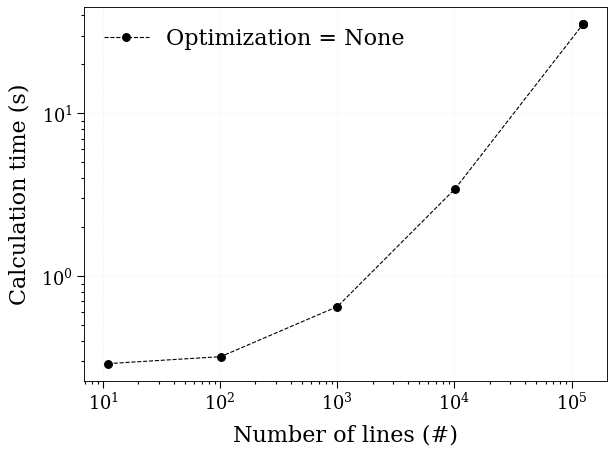

In [11]:
#%% Compare performance for N_lines
set_style('origin')
plt.figure()
plt.plot(Nlines, [spectra_default[N].conditions['calculation_time'] for N in Nlines], '--ok', label = "Optimization = None" )
plt.xlabel('Number of lines (#)')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Calculation time (s)')
plt.legend()
fix_style('origin')

Manually checking the time taken by **_calc_lineshape()** and **_apply_lineshape()** for different N_lines   

**(N_lines ,  _calc_lineshape()  , _apply_lineshape())** <br>
10, 0, 0<br>
1e2, 0, 0 <br>
1e3, 0.3, 0<br>
1e4, 2.8, 02<br>
1e5, 34.2, 2.5       <br>

In [12]:
print(Nlines_target)
print(spectra_default)

[10.0, 100.0, 1000.0, 10000.0, 100000.0, 110000.0, 120000.0]
{11: <radis.spectrum.spectrum.Spectrum object at 0x7f2d7805a350>, 101: <radis.spectrum.spectrum.Spectrum object at 0x7f2d780597d0>, 1003: <radis.spectrum.spectrum.Spectrum object at 0x7f2d78059ed0>, 10132: <radis.spectrum.spectrum.Spectrum object at 0x7f2d78059e50>, 124962: <radis.spectrum.spectrum.Spectrum object at 0x7f2d77429750>}
